# Mandelbrotmengen

In dieser Fallstudie implementieren wir die berühmten Visualisierungen der Mandelbrotmengen, die Sie sicher bereits gesehen haben. Die Mandelbrotmenge geht auf den Mathematiker Benoit Mandelbrot zurück, welcher neben vielen anderen Dingen auch die Geometrie von Fraktalen studiert hat. 

Wie wir sehen werden, ist die Berechnung einer Mandelbrotmenge etwas ganz einfaches. Wir betrachten für eine Zahl $\mathtt z$ und eine Konstante $\mathtt c$ die Funktion $f_c(\mathtt z)=\mathtt z^2 + \mathtt c$. Wir können diese Funktion, beginnend bei 0, immer wieder auf sich selber anwenden, wir berechnen also die Folge der Elemente $\mathtt s_i$ wie folgt

$
\begin{align}
& \mathtt s_0 = \mathtt 0 \\
& \mathtt s_1 = f_c(\mathtt 0) = f_c(\mathtt s_0 )\\
& \mathtt s_2 = f_c(f_c(\mathtt 0)) = f_c(\mathtt s_1 )\\
& \mathtt s_3 = f_c(f_c(f_c(\mathtt 0))) = f_c(\mathtt s_2 )\\
& \vdots \\
& \mathtt s_{n+1} = f_c(\mathtt s_n)
\end{align}
$

Wenn diese Funktion nach einer bestimmten Anzahl Anwendungen kleiner als eine bestimmte Zahl ist (mathematisch als *nicht divergiert* bezeichnet), dann ist die Zahl $\mathtt c$ Teil der Mandelbrotmenge. Wie wir sehen werden, entspricht diese Berechnung einer einfachen While-Schleife.

In [5]:
c = 1
s0 = 0
s1 = s0 * s0 + c
s2 = s1 * s1 + c
s3 = s2 * s2 + c

def s(n, c):
    z = 0
    for i in range(0, n):
        z = z * z + c
    return z


#### Komplexe Zahlen

Es gibt jedoch noch eine kleine Besonderheit: Die Zahlen $\mathtt c$ und $\mathtt z$ sind keine "normalen" Zahlen, wie wir sie aus der Schule kennen, sondern sogenannte *komplexe Zahlen*. In dieser Fallstudie werden wir eine Klasse schreiben um komplexe Zahlen zu repräsentieren.

Komplexe Zahlen bestehen aus zwei Teilen, einem Realteil und einem Imaginärteil. In Büchern wird der Imaginärteil meist durch ein $i$ gekennzeichnet. So ist zum Beispiel 2 + 3i eine Komplexe Zahl, die aus dem Realteil 2 und dem Imaginärteil 3 besteht. Wir können uns eine Komplexe Zahl aber einfach als Tupel $(a, b)$ bestehend aus zwei Zahlen vorstellen, auf dem wir dann spezielle Rechenregeln definieren.  

Zwei komplexe Zahlen $\mathtt x$ und $\mathtt y$ werden nach folgenden Regeln addiert und multipliziert:

$
\begin{align}
& \mathtt x = (a, b) \\
& \mathtt y = (c, d) \\
& \mathtt x + \mathtt y = (a + c, b + d) \\
& \mathtt x \cdot \mathtt y = (a c - b d, a d + b c)
\end{align}
$

Als letzte Operation benötigen wir noch den Betrag einer Zahl. Dieser ist definiert als 

$
\text{abs}(\mathtt x) = \sqrt{a a + b b}.
$

Einmal mehr brauchen wir für die Umsetzung der Mathematik und alle nötigen Berechnungen nicht mehr als Addition, Multiplikation, Subtraktion sowie die Quadratwurzel.

### Implementation komplexer Zahlen

In einem ersten Schritt schaffen wir uns nun die Grundlagen, so dass wir die Mathematische Funktion möglichst einfach implementieren können. Wir werden die Repräsentation von komplexen Zahlen und die oben beschriebenen Operationen darauf implementieren.

Wir definieren uns dazu eine Klasse. Diese speichert den Real-  und den Imaginäranteil der Zahl als Attribute `real` und `imag` der Klasse. Die Operationen ```add```, ```multiply``` und ```abs``` implementieren wir als Methoden. 

In [22]:
import math

class Complex:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
    
    def add(self, other):
        new_real = self.real + other.real
        new_imag = self.imag + other.imag
        
        return Complex(new_real, new_imag)
    
    def multiply(self, other):
        new_real = self.real * other.real - self.imag * other.imag
        new_imag = self.real * other.imag + self.imag * other.real
        return Complex(new_real, new_imag)
    
    def abs(self):
        return math.sqrt(self.real * self.real + self.imag * self.imag)
    
    def __str__(self):
        return str(self.real) + "+" + str(self.imag) +"i"
        
c1 = Complex(3, 4)
c2 = Complex (4, 5)

c3 = c1.add(c2).multiply(c1)
print(c3)


-15+55i


## Berechnung der Mandelbrotmenge

Nun können wir die Mandelbrotmenge berechnen. Die Funktion ```compute_mandelbrot``` nimmt eine Zahl $\mathtt c$ entgegen und berechnet wie oben angegeben die Folge der Funktionen $\mathtt s_0 \rightarrow \mathtt s_1 \rightarrow \mathtt s_2 \rightarrow \cdots$. Wenn der Betrag der so berechneten Zahl einmal grösser als die Zahl 2 ist, dann sagen wir, dass die Folge divergiert und die Zahl $\mathtt c$ somit nicht in der Mandelbrotmenge ist. 

Neben der Zahl $\mathtt c$ geben wir als zweites Argument noch ```max_iterations``` mit. Dieses Argument gibt an, wie lange wir die Funktion maximal immer wieder auf sich selbst anwenden, bevor wir entscheiden, dass diese divergiert oder nicht. Wenn der Betrag der Zahl also während ```max_iterations``` Iterationen immer kleiner als 2 bleibt, dann entscheiden wir, dass die Zahl Teil der Mandelbrotmenge ist. 

Der Rückgabewert wäre entsprechend entweder ```True``` oder ```False``` je nachdem ob die Zahl $\mathtt c$ Teil der Menge ist. Für die Visualisierung ist es aber schöner, wenn wir die Anzahl Iterationen zurückgeben, die wir berechnet haben, bevor der Betrag der berechneten Zahl das erste Mal grösser als 2 geworden ist. So können wir dann mit unterschiedlichen Farben veranschaulichen, welche Zahl wie schnell divergiert ist. 

In [35]:
def compute_mandelbrot(c, max_iterations):
    i = 0
    z = Complex(0, 0)
    while i < max_iterations and z.abs() <= 2:
        z = z.multiply(z).add(c)
        i = i + 1
        
    return i

### Visualisierung der Mandelbrotmenge

Für die Visualisierung der Mandelbrotmenge nutzen wir wieder ```PyPlot```. 

In [36]:
from matplotlib.pyplot import *

Als erstes erstellen wir uns ein Bild mit $m \times n$ Pixeln. Wie immer stellen wir das als Liste von Listen dar. 

In [37]:
def create_image(m, n):
    image = []
    for i in range(0, m):
        image.append([0] * n)
    return image

Jeder Pixel im Bild entspricht einer Komplexen Zahl $\mathtt c$. Das einfachste wäre, wenn der Pixel $(0,0)$ der komplexen Zahl $0 + 0i$ entsprechen würde, der Pixel $(1, 0)$ der komplexen Zahl $1 + 0i$, und so weiter. Wenn wir ein Bild mit $m \times n$ Pixeln haben, würden wir also den rechteckigen Ausschnitt von $0 + 0i$  bis $m + ni$ visualisieren. 

Jedoch stellt sich heraus, dass dieser Teil der Mandelbrotmenge nicht sonderlich spannend ist. Deshalb führen wir eine Funktion ein, die uns erlaubt in beliebige Teile der Menge hinein zu zoomen. Dies machen wir, indem wir jeden Index skalieren und verschieben. 

In [40]:
def pixel_to_complex_num(i, j, scaling, pan_x, pan_y):
    return Complex(i * scaling + pan_x, (j * scaling + pan_y))

Für die Visualisierung iterieren wir einfach über jeden Pixel des Bildes, wandeln dieses in eine Komplexe Zahl um und geben diesem Eintrag dann den entsprechenden Wert. 

In [41]:
def visualize(max_iterations, scaling, point_x, point_y):
    image = create_image(256, 256)
    for i in range(0, 256):
        for j in range(0, 256):
            c = pixel_to_complex_num(i, j, scaling, point_x, point_y)
            n = compute_mandelbrot(c, max_iterations)
            image[i][j] = n
    return image
            

In [52]:
image = visualize(100, 0.005, -2,  -1.2)

(-0.5, 255.5, 255.5, -0.5)

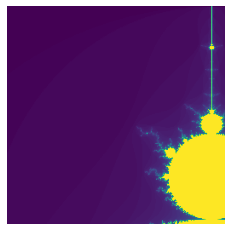

In [53]:
imshow(image)
axis("off")

#### Kamerafahrt

Wenn Sie die folgende Zelle ausführen, dann sehen Sie eine "Kamerafahrt" welche immer stärker auf einen angegebenen Punkt mit Bildkoordinaten (`zoom_to_x`,`zoom_to_y`) fokusiert und visualisiert wie fein die Strukturen dieses Fraktals auflösen. Sie müssen die Details dieses Codes nicht verstehen. 

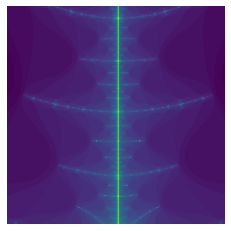

In [54]:
from IPython.display import clear_output    # Steuern der Ausgabe in Jupyter-Notebooks
scaling = 0.01
num_iterations = 50
zoom_to_x = 21
zoom_to_y = 130
while scaling > 3e-6:
    image = visualize(num_iterations, scaling, -2.0-zoom_to_x*(scaling-0.01),  -1.3-zoom_to_y*(scaling-0.01))
    imshow(image)
    axis("off")
    show()
    clear_output(wait=True)    
    scaling = scaling * 0.8
    num_iterations = num_iterations + 1